In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Set font sizes for all text elements in the plot
plt.rcParams.update({
    'font.size': 8,          # Default font size
    'axes.titlesize': 10,    # Title font size
    'axes.labelsize': 9,     # Axis labels font size
    'xtick.labelsize': 8,    # X-axis tick labels font size
    'ytick.labelsize': 8,    # Y-axis tick labels font size
    'legend.fontsize': 8,    # Legend font size
    'figure.titlesize': 10   # Figure title font size
})
plt.rcParams['font.family'] = 'sans-serif'

In [14]:
def I_dCaAP(v,t,t_spike):
        w = -1.6
        return w * K(v) * (A(t,t_spike)-B(t,t_spike))
        

    
    
def A(time,spike_time):
    tau_A = 3#ms
    return 1/(1+np.exp(-(time-spike_time)/tau_A))


    


def B(time , spike_time):
    tau_B = 0.4 #ms
    delta_t = 21 #ms
    return 1/(1+np.exp(-(time -(spike_time+delta_t))/tau_B))


def K(voltage):
    v_th = -36 #mV
    v_rest = -75
    tau_K = 0.3
    result_K = np.exp(-(voltage-v_th)/((v_th - v_rest)* tau_K))
    if result_K >= 1:
        return 0
    else:
        return result_K
    


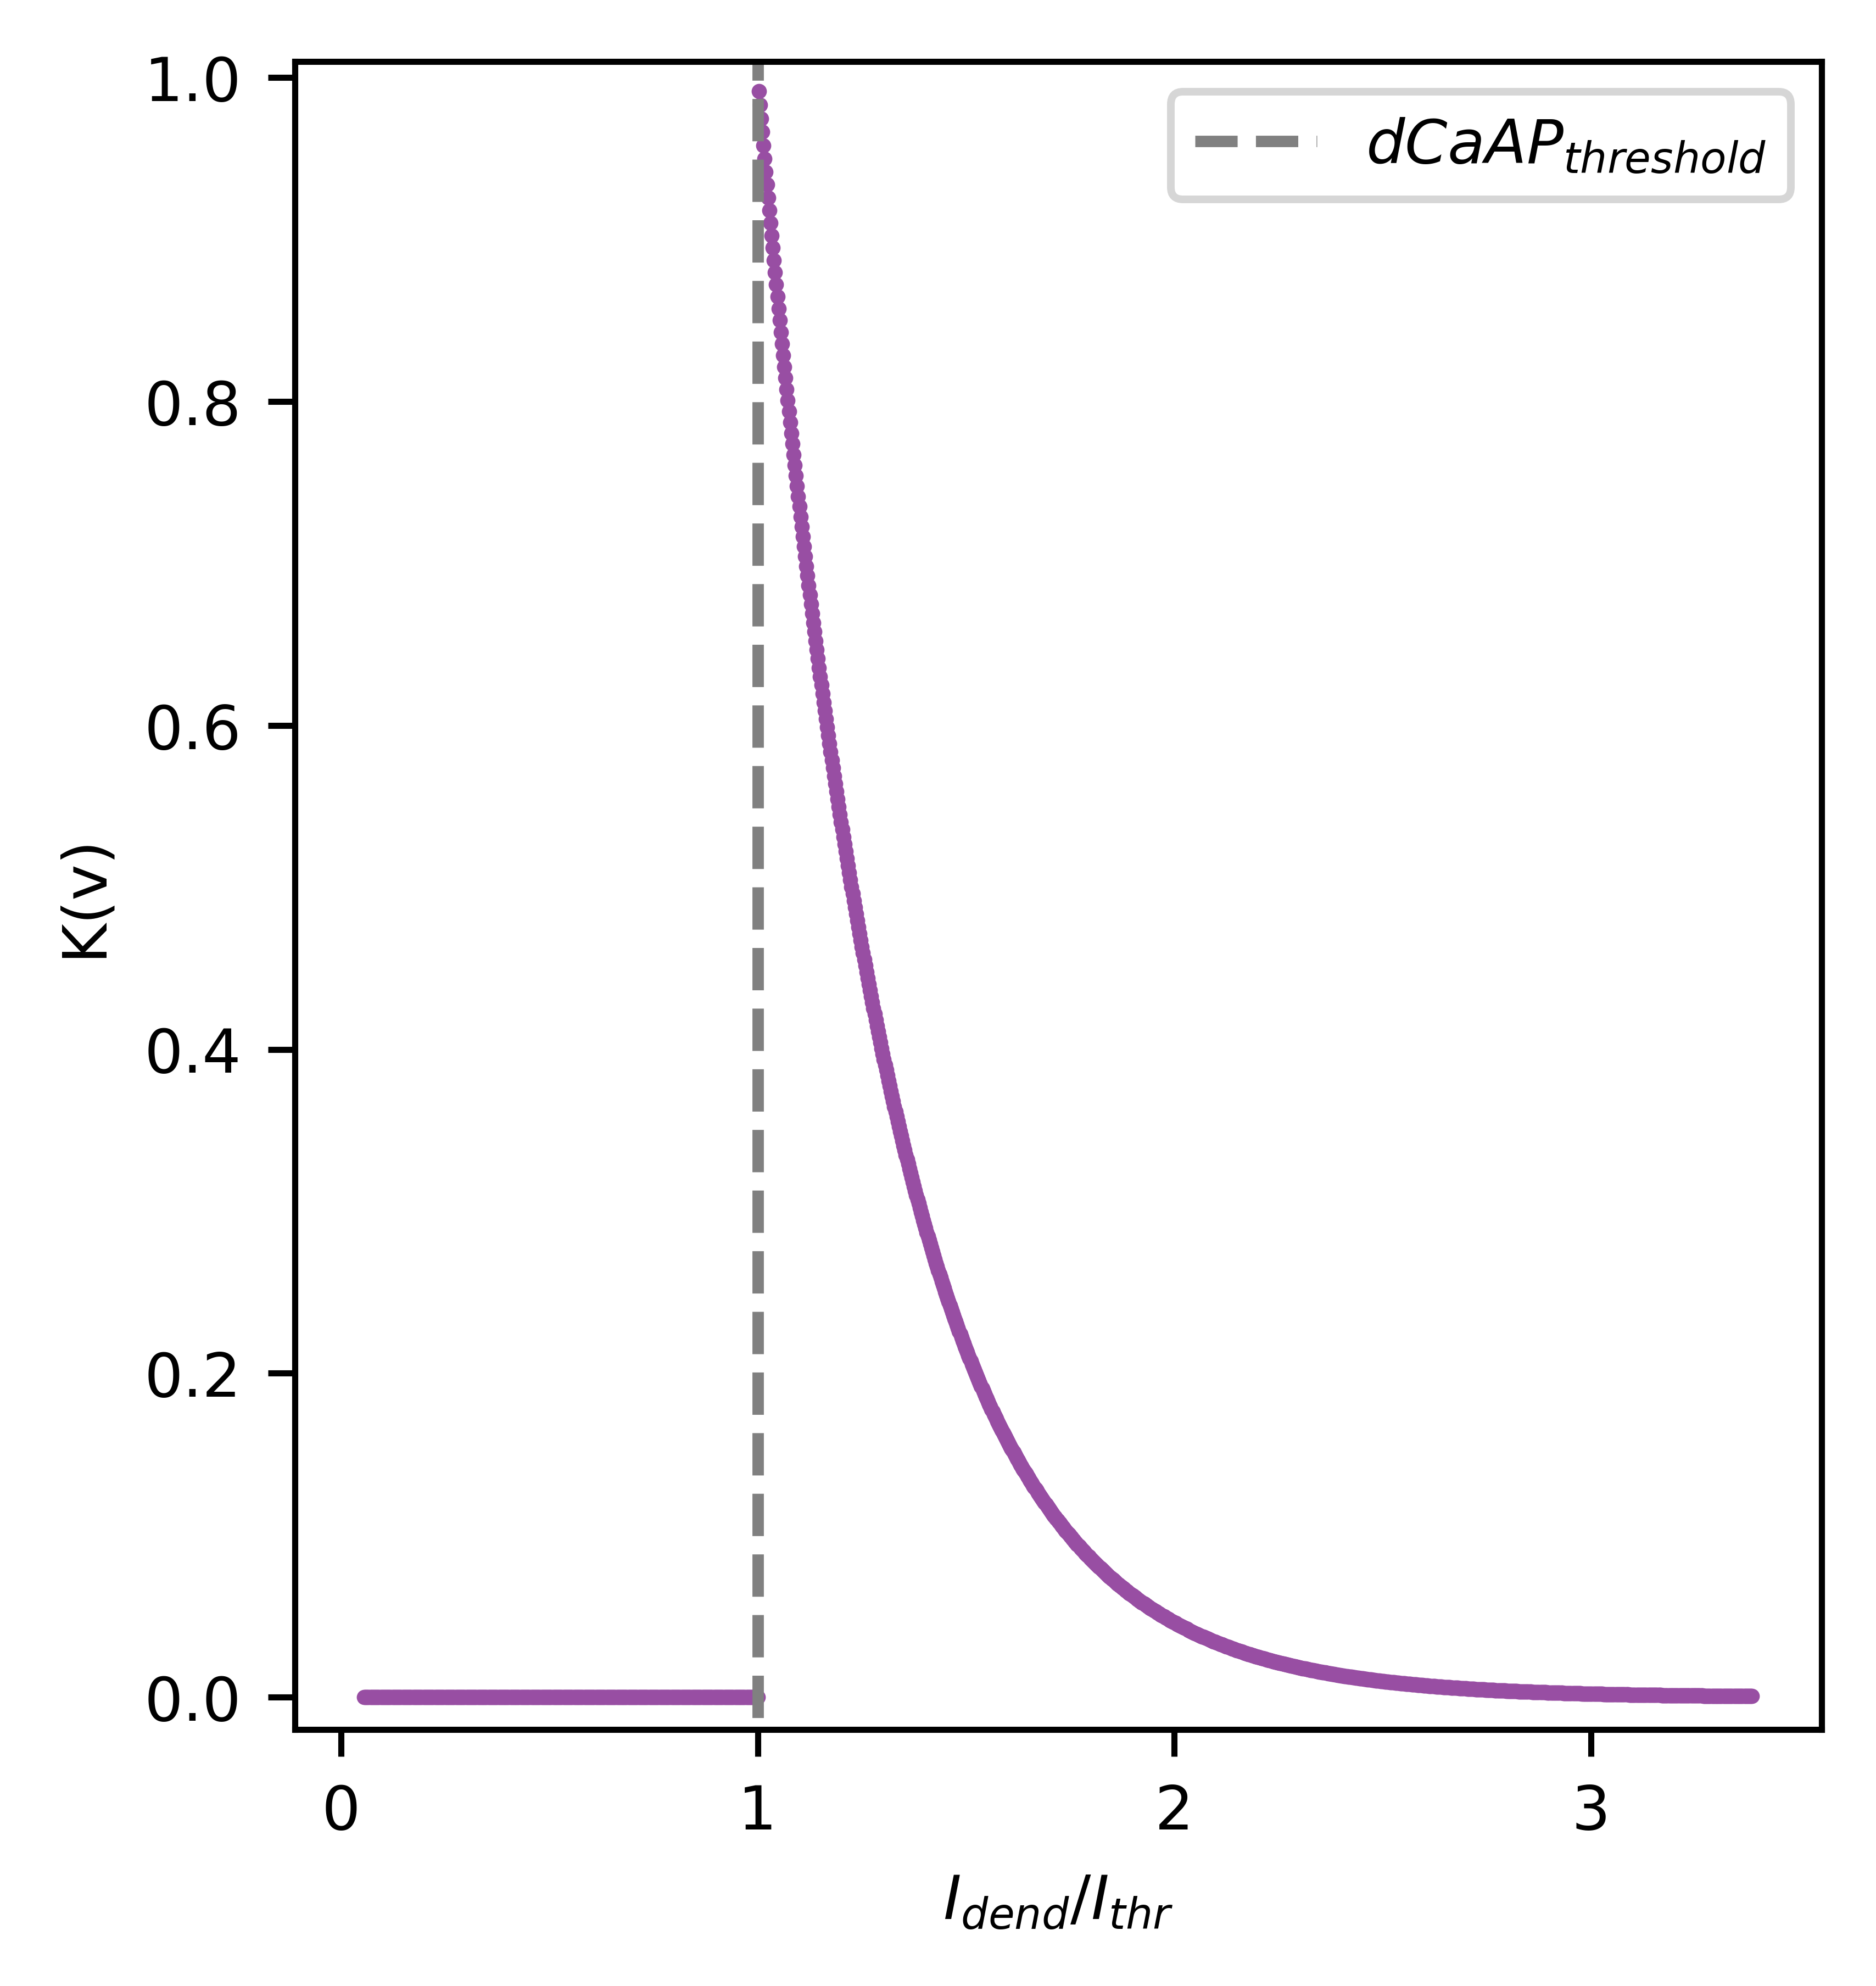

In [18]:
# range_v = np.arange(-70,50,.1)
# fig, axs = plt.subplots(figsize=(3.3, 3.5), dpi=300,constrained_layout = True)
# results = [K(V) for V in range_v]
# axs.set_xlabel("Dendritic Membrane Potential (mV)")
# axs.set_ylabel("K(v)")
# axs.vlines(-36,-0.05,1.02,linestyle="--",color = 'r',label="$dCaAP_{threshold} = -36.0mV$")
# axs.set_ylim(-.02,1.02)
# plt.scatter(range_v/-36,np.array(results),s = 1)
# plt.xticks()
# plt.yticks()
# plt.legend()

range_v = np.arange(-70,50,.1)
fig, axs = plt.subplots(figsize=(3.3, 3.5), dpi=1000,constrained_layout = True)
results = [K(V) for V in range_v]
axs.set_xlabel("$I_{dend}/I_{thr}$")
axs.set_ylabel("K(v)")
axs.vlines(-1,-0.05,1.02,linestyle="--",color = 'gray',label="$dCaAP_{threshold}$")
axs.set_ylim(-.02,1.01)
axs.scatter(range_v/36,np.array(results),s = 1,color = plt.get_cmap('Set1')(3))
axs.set_xticks([-2,-1,0,1],['0','1','2','3'])
axs.set_yticks(np.arange(0,1.01,0.2))
plt.legend()

fig.savefig("Figures/pdf/Gidon_model.pdf", format='pdf',bbox_inches='tight')
fig.savefig("Figures/svg/Gidon_model.svg", format='svg',bbox_inches='tight')

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

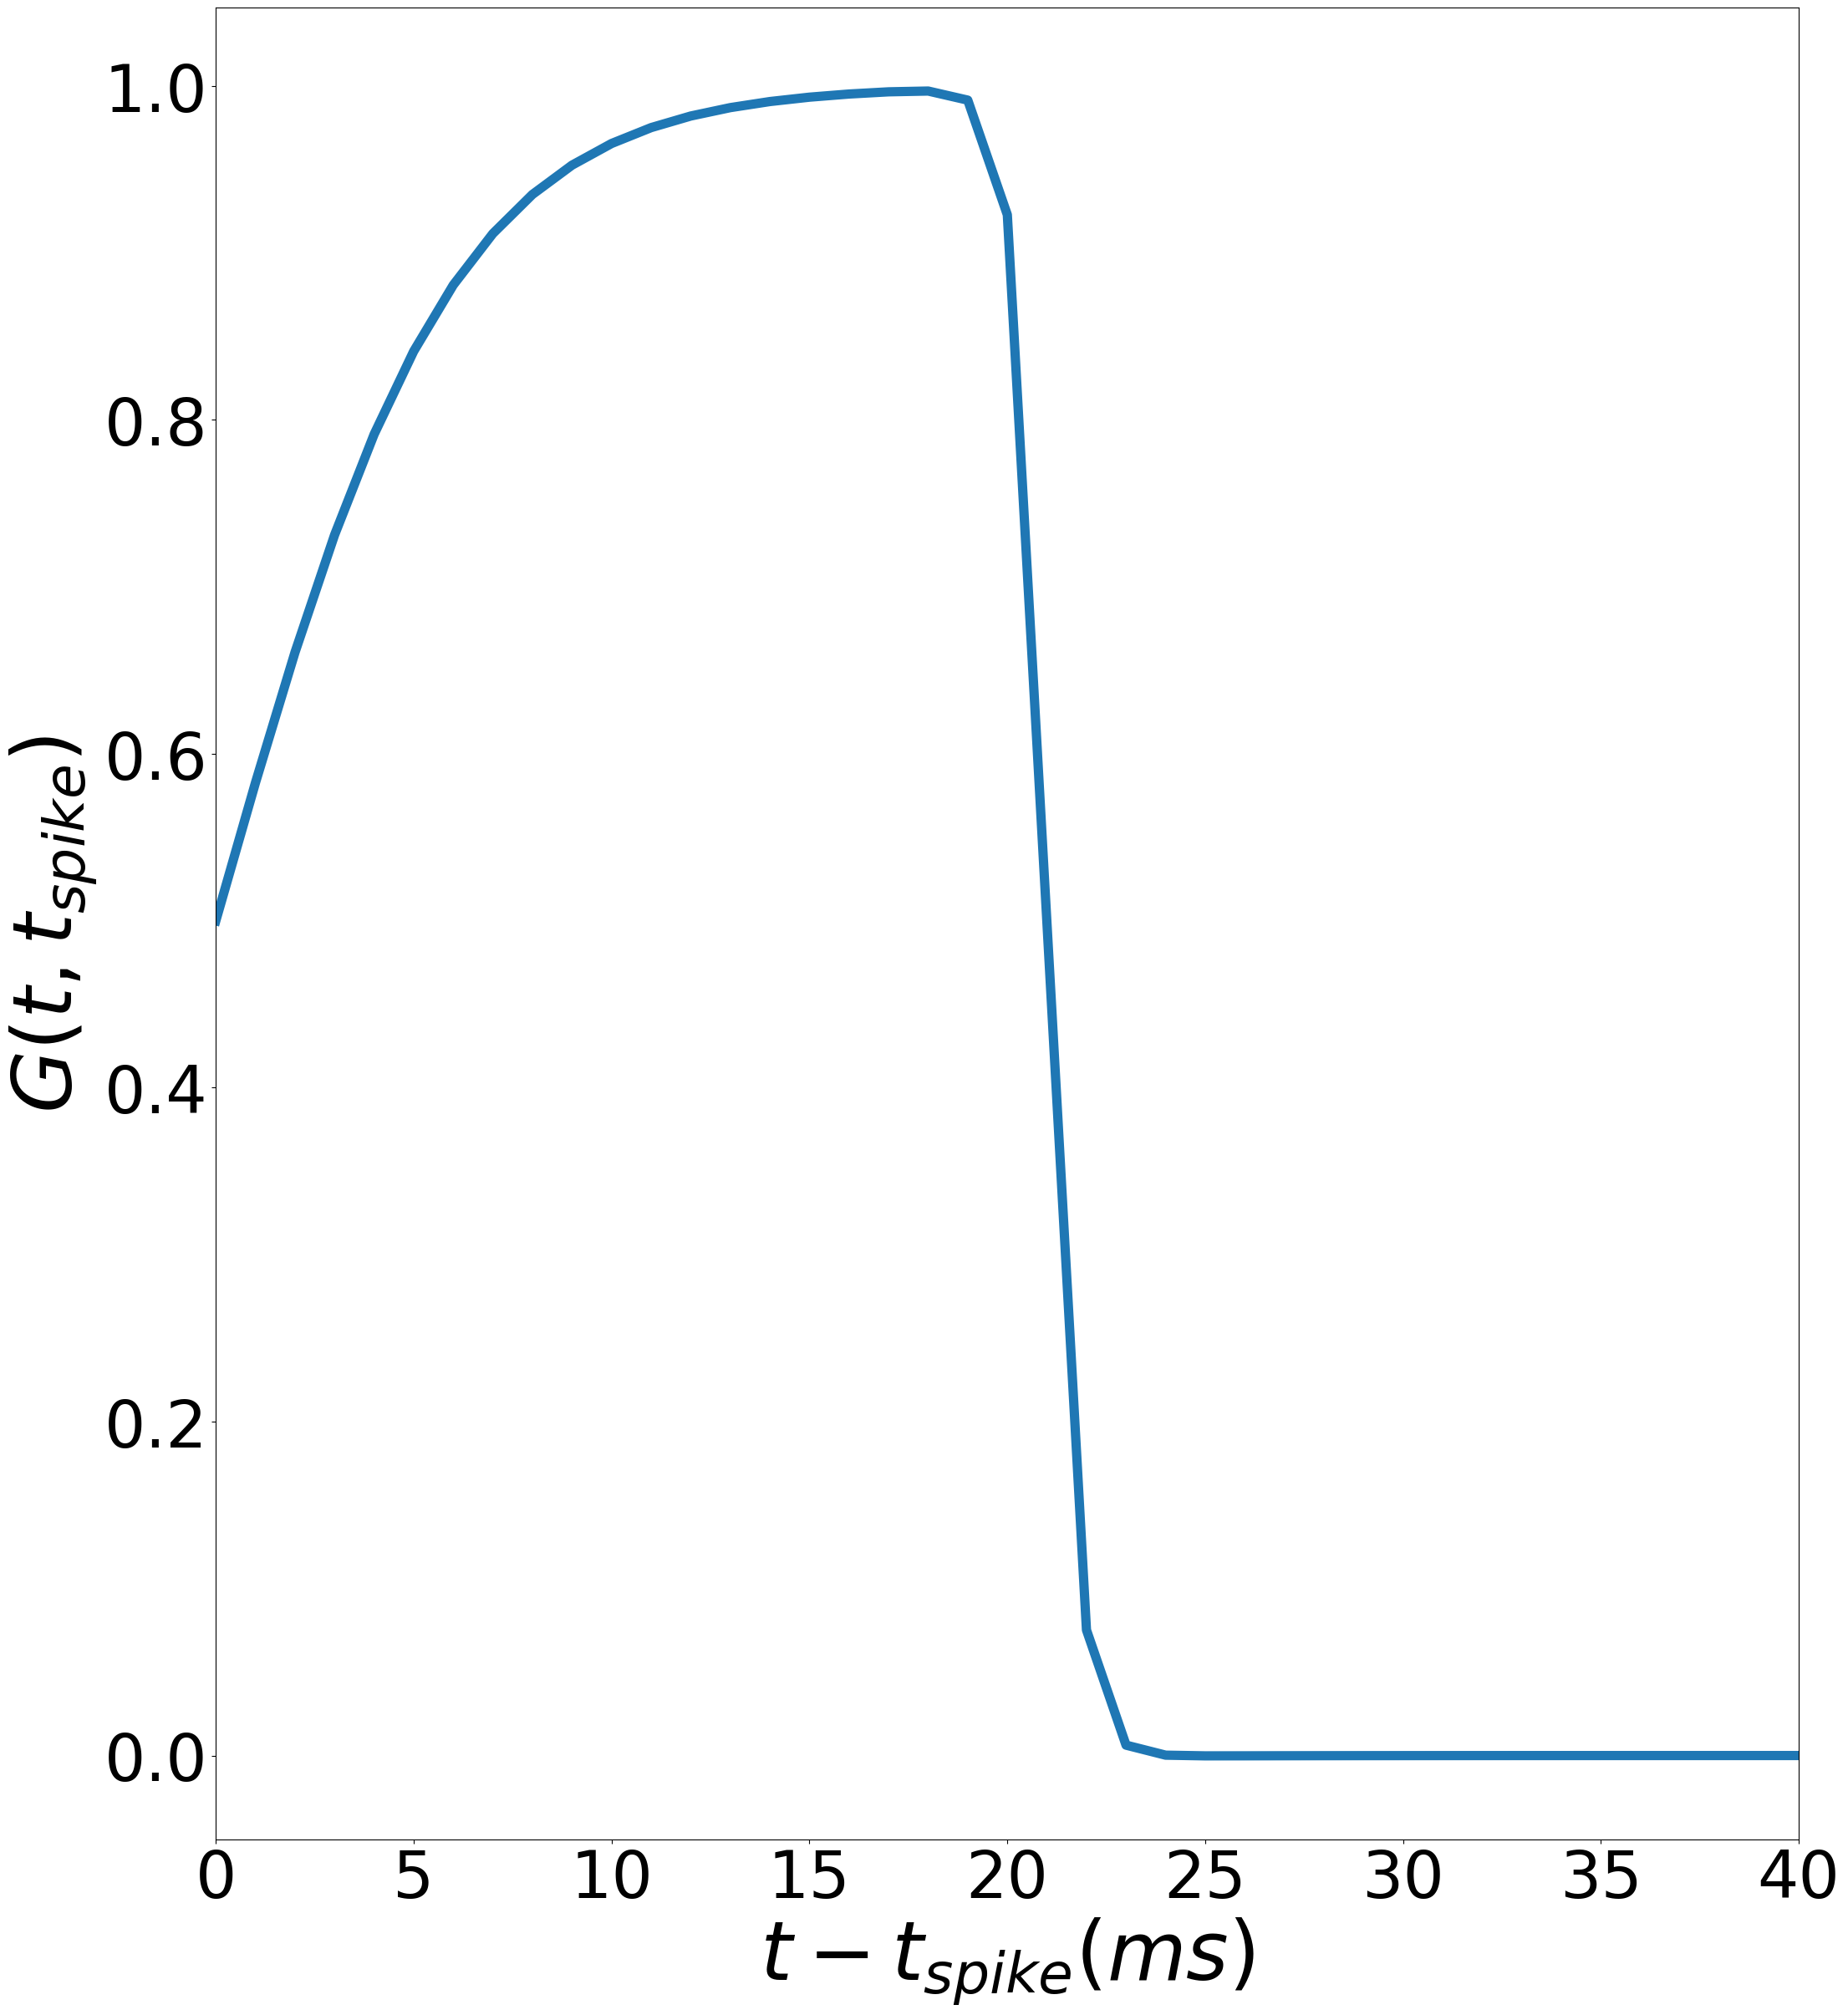

In [58]:
time_serie = np.arange(0,100,1)
results = [(A(tik,0)-B(tik,0)) for tik in time_serie]

# plt.plot(time_serie,np.array(results))
# plt.ylabel("A(t)-B(t)")
# plt.xlabel('t(ms)')
# plt.title("t_spike = 50ms")
fig, axs = plt.subplots(figsize=(22,24),constrained_layout = True)
axs.plot(time_serie,np.array(results),linewidth = 8)
axs.set_xlabel("$t - t_{spike}(ms)$",fontsize = fs)
axs.set_ylabel("$G(t,t_{spike})$",fontsize = fs)
# axs.vlines(-36,-0.05,1.02,linestyle="--",color = 'r')
axs.set_xlim(0,40)
# plt.scatter(range_v,np.array(results))
plt.xticks(fontsize=fs*0.8)
plt.yticks(fontsize=fs*0.8)

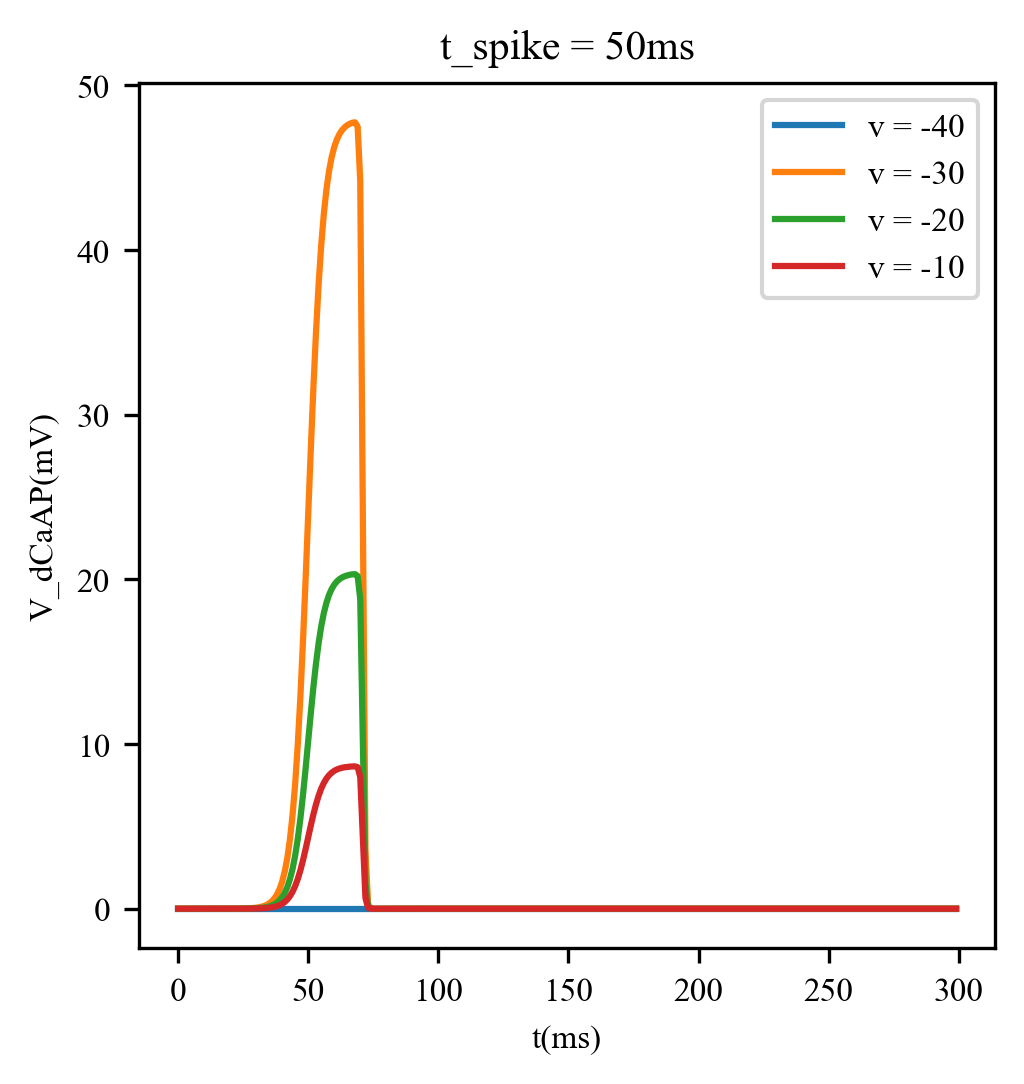

In [12]:
time_serie = np.arange(0,300,1)
range_v = np.arange(-40,0,10)
fig, axs = plt.subplots(figsize=(3.3, 3.5), dpi=300,constrained_layout = True)

results = []
for V in range_v:
    results.append([-50* I_dCaAP(V,tik,50) for tik in time_serie])
        
        
for i in range(len(results)):
    axs.plot(time_serie,results[i],label = "v = "+str(range_v[i]))
# plt.xlim(20,100)
axs.set_xlabel('t(ms)')
axs.set_ylabel('V_dCaAP(mV)')
axs.set_title("t_spike = 50ms")
axs.legend()